Epoch [10/100], Loss: 0.8726
Epoch [20/100], Loss: 0.6342
Epoch [30/100], Loss: 0.5464
Epoch [40/100], Loss: 0.4499
Epoch [50/100], Loss: 0.3273
Epoch [60/100], Loss: 0.2029
Epoch [70/100], Loss: 0.1263
Epoch [80/100], Loss: 0.0895
Epoch [90/100], Loss: 0.0690
Epoch [100/100], Loss: 0.0557
Accuracy: 1.00
Predicted class: setosa


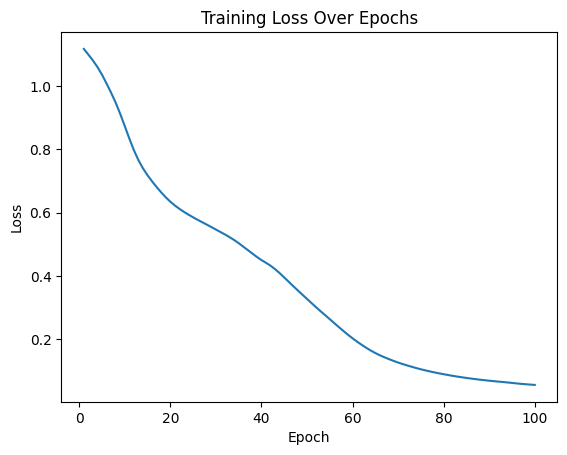

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0, 1, 2 for setosa, versicolor, virginica

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the deep neural network model
class DeepIrisNet(nn.Module):
    def __init__(self):
        super(DeepIrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)  # Input layer to hidden layer 1
        self.fc2 = nn.Linear(16, 12)  # Hidden layer 1 to hidden layer 2
        self.fc3 = nn.Linear(12, 8)   # Hidden layer 2 to hidden layer 3
        self.fc4 = nn.Linear(8, 3)    # Hidden layer 3 to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No activation for output layer
        return x

# Create the model
model = DeepIrisNet()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot training loss
plt.plot(range(1, num_epochs+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.savefig('training_loss.png')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy:.2f}')

# Example prediction
new_sample = scaler.transform([[5.1, 3.5, 1.4, 0.2]])  # Sample from setosa
new_sample = torch.tensor(new_sample, dtype=torch.float32)
with torch.no_grad():
    output = model(new_sample)
    _, predicted_class = torch.max(output, 1)
    print(f'Predicted class: {iris.target_names[predicted_class.item()]}')

    